In [47]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score

In [48]:
boston = load_boston()
boston

C:\ProgramData\Anaconda3\envs\torchtest\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [49]:
df = pd.DataFrame(boston['data'])
df.columns = boston['feature_names']
df['medv'] = boston['target']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### 상관관계

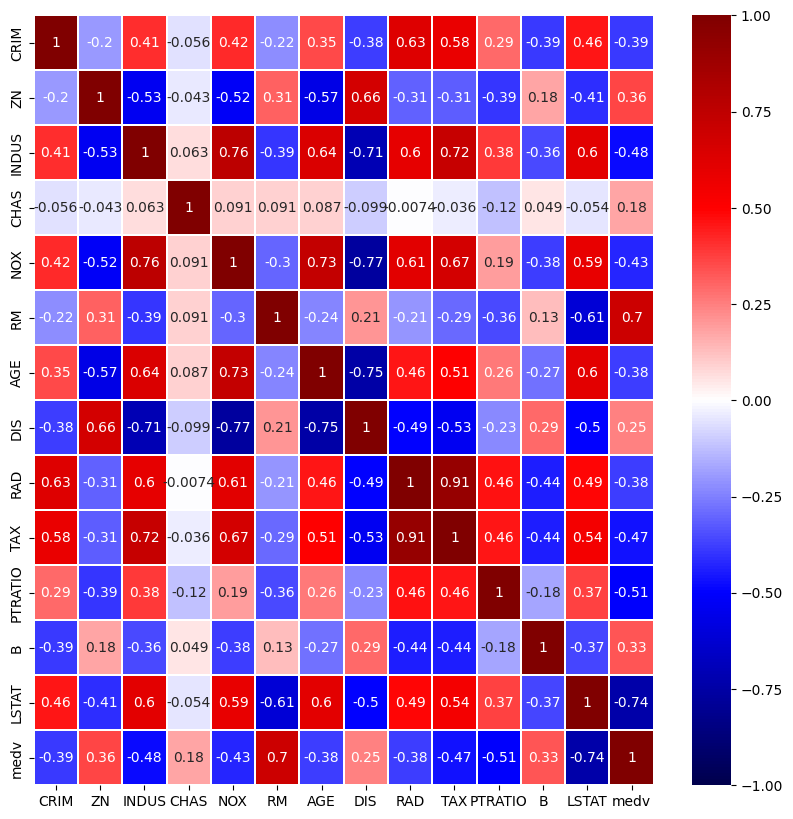

In [50]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr(), vmin = -1, vmax = 1, annot=True, 
           linewidths=0.2, cmap='seismic')
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.show()

In [51]:
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,[-1]].values

### 정규화

In [52]:
scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform(x_data)

In [53]:
x = torch.FloatTensor(x_dataN)
y = torch.FloatTensor(y_data)

In [54]:
x.shape

torch.Size([506, 13])

In [55]:
model = Sequential()
model.add_module('nn1', Linear(13, 1))
loss_fn = MSELoss()
optimizer = Adam(model.parameters(), lr=0.1)

In [56]:
hist=[]
for step in range(1000):
    optimizer.zero_grad()
    hx = model.forward(x) # matmul (x, w) + b # model(x) 가능
    cost = loss_fn(hx, y)
    cost.backward()
    optimizer.step()
    print(step, cost.item())
    hist.append(cost.item())

0 585.3812866210938
1 559.924560546875
2 535.2449340820312
3 511.3551025390625
4 488.2664489746094
5 465.98895263671875
6 444.53094482421875
7 423.8991394042969
8 404.09844970703125
9 385.1320495605469
10 367.0008544921875
11 349.7041015625
12 333.2387390136719
13 317.5994567871094
14 302.77886962890625
15 288.7672424316406
16 275.552734375
17 263.12115478515625
18 251.4560089111328
19 240.53884887695312
20 230.3489990234375
21 220.86376953125
22 212.0586700439453
23 203.9074249267578
24 196.38221740722656
25 189.45382690429688
26 183.09190368652344
27 177.2651824951172
28 171.94161987304688
29 167.08880615234375
30 162.67408752441406
31 158.66485595703125
32 155.02880859375
33 151.73414611816406
34 148.74989318847656
35 146.0459442138672
36 143.5934295654297
37 141.36471557617188
38 139.33367919921875
39 137.47576904296875
40 135.76809692382812
41 134.1895294189453
42 132.7206573486328
43 131.3439178466797
44 130.04354858398438
45 128.80548095703125
46 127.61739349365234
47 126.468605

516 33.69972610473633
517 33.66288375854492
518 33.62617874145508
519 33.589603424072266
520 33.55316162109375
521 33.51686096191406
522 33.480690002441406
523 33.44465255737305
524 33.40875244140625
525 33.37297439575195
526 33.33732986450195
527 33.301815032958984
528 33.266441345214844
529 33.23119354248047
530 33.196075439453125
531 33.16109085083008
532 33.1262321472168
533 33.09149932861328
534 33.05690002441406
535 33.02242660522461
536 32.98808288574219
537 32.95387268066406
538 32.91978454589844
539 32.88582229614258
540 32.851985931396484
541 32.81828308105469
542 32.784706115722656
543 32.751251220703125
544 32.717918395996094
545 32.68471145629883
546 32.651634216308594
547 32.61867904663086
548 32.585845947265625
549 32.553138732910156
550 32.52055358886719
551 32.48808670043945
552 32.45574951171875
553 32.42353439331055
554 32.39143371582031
555 32.35946273803711
556 32.32761001586914
557 32.29587936401367
558 32.26426315307617
559 32.23277282714844
560 32.20140075683594

988 25.569608688354492
989 25.562700271606445
990 25.55580711364746
991 25.548933029174805
992 25.542078018188477
993 25.535242080688477
994 25.528417587280273
995 25.521615982055664
996 25.51483154296875
997 25.50806427001953
998 25.501314163208008
999 25.494583129882812


### Cost의 Plot 차트

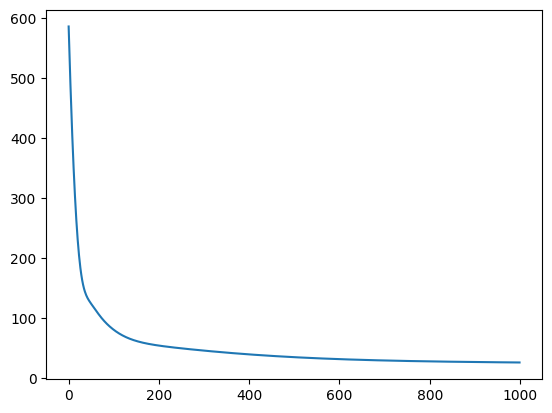

In [57]:
plt.plot(hist)
plt.show()

#### 정규화 전 데이터

In [25]:
x_data.values[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

#### 정규화 후 데이터

In [26]:
x_dataN[0]

array([0.        , 0.18      , 0.06781525, 0.        , 0.31481481,
       0.57750527, 0.64160659, 0.26920314, 0.        , 0.20801527,
       0.28723404, 1.        , 0.08967991])

### 0번째 행 예측값

In [35]:
model(torch.FloatTensor(x_dataN[0].reshape(1,13)))

tensor([[29.6504]], grad_fn=<AddmmBackward0>)

### 결정계수 값

In [58]:
x_dataN

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [36]:
pred = model(torch.FloatTensor(x_dataN)).detach().numpy()

In [38]:
r2_score(y_data, pred)

0.697997998705194